# Neural Network

In [1]:
import pandas as pd #for manipulating the data set
import tensorflow
from tensorflow import keras #first had to install the keras package used for image neural network processing on anaconda
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split #for splitting the data into train and test
import keras.backend as K
K.clear_session()
from keras import optimizers
from sklearn.preprocessing import StandardScaler #for zero-mean and unit variance
sc = StandardScaler()

Using TensorFlow backend.


Next we import the data from http://archive.ics.uci.edu/ml/datasets/Forest+type+mapping and note that it was already separated into training and testing in .csv format. 

The data info: "This data set contains training and testing data from a remote sensing study which mapped different forest types based on their spectral characteristics at visible-to-near infrared wavelengths, using ASTER satellite imagery. The output (forest type map) can be used to identify and/or quantify the ecosystem services (e.g. carbon storage, erosion protection) provided by the forest."

The classes are: "'s' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)"

The features represent spectral data consisting of 9 spectral bands and 18 "similarity measures calculated from the IDW interpolated values".

The paper http://www.cr.chiba-u.jp/~tateishi-lab/pdf/2011/Using%20geographically%202011.pdf utilized an SVM algorithm and we hope to improve on its accuracy by using a simple neural network below.



In [2]:
#the data as provided by the UCI database already split
df_train = pd.read_csv('training.csv',delim_whitespace=False)
df_test = pd.read_csv('testing.csv',delim_whitespace=False)
df_test.shape #325 examples of 27 features each
df_train.shape #198 examples of 27 features each - 62:38 ratio of test v. train

(198, 28)

In [3]:
class_mapping={label:idx for idx,label in enumerate(np.unique(df_train['class']))} # change the class names which are strings to integers
df_train['class']=df_train['class'].map(class_mapping)
class_mapping={label:idx for idx,label in enumerate(np.unique(df_test['class']))}
df_test['class']=df_test['class'].map(class_mapping)
X_train, y_train = df_train.iloc[:, 1:].values, df_train.iloc[:, 0].values # the first column is class header
X_test, y_test = df_test.iloc[:, 1:].values, df_test.iloc[:, 0].values # the first column is class header
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Now we create a very simple network.  The features are:
*  We have one hidden layer with `nh=100` units.  
*  One output layer with `nout=4` units, one for each of the 4 possible classes
*  The output activation is `softmax`, which is used for multi-class targets

In [4]:
nin = X_train.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = 4   # number of outputs = 4 since there are 4 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden')) # we keep the activation function as a sigmoid
model.add(Dense(nout, activation='softmax', name='output'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary() #we will be training all of the parameters in the neural network

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               2800      
_________________________________________________________________
output (Dense)               (None, 4)                 404       
Total params: 3,204
Trainable params: 3,204
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # doing gradient descent to update te parameters with learning rate of 0.001
             loss='sparse_categorical_crossentropy', #loss function instead of squared difference sparse categorical crossentropy due to multi-class system
             metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 3ms/step - loss: 1.4255 - acc: 0.1768 - val_loss: 1.4002 - val_acc: 0.1815
Epoch 2/2000
198/198 [==============================] - 0s 112us/step - loss: 1.4203 - acc: 0.1768 - val_loss: 1.3954 - val_acc: 0.1938
Epoch 3/2000
198/198 [==============================] - 0s 131us/step - loss: 1.4146 - acc: 0.1667 - val_loss: 1.3901 - val_acc: 0.2123
Epoch 4/2000
198/198 [==============================] - 0s 185us/step - loss: 1.4095 - acc: 0.1667 - val_loss: 1.3864 - val_acc: 0.2154
Epoch 5/2000
198/198 [==============================] - 0s 83us/step - loss: 1.4047 - acc: 0.1616 - val_loss: 1.3822 - val_acc: 0.2277
Epoch 6/2000
198/198 [==============================] - 0s 177us/step - loss: 1.4007 - acc: 0.1667 - val_loss: 1.3757 - val_acc: 0.2400
Epoch 7/2000
198/198 [==============================] - 0s 248us/step - loss: 1.3961 - acc: 0

* The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated. We touched briefly upon batch gradient descent in neural lecture.
* The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset. What we call num_iter in the gradient descent algorithm - update number

In [8]:
sigmoid1 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, around 78% accuracy
sigmoid1_train = model.evaluate(X_train,y_train, batch_size=32)
print(sigmoid1[1])

198/198 [==============================] - 0s 292us/step
0.766153846337245


In [9]:
opt = optimizers.Adam(lr=0.001) # our optimizer for this model is Adam instead of the stochastic gradient because the learning rate will be flexible as well which comes in hand when we plateau and it also finds individual parameter learning rates. The starting learning rate is 0.001
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy', #we picked the sparse_categorical_crossentropy loss function because our classes are mutually exclusive (e.g. when each sample belongs exactly to one class)
              metrics=['accuracy'])

* The batch size is a hyperparameter of gradient descent that controls the number of training samples to work through before the model’s internal parameters are updated. We touched briefly upon batch gradient descent in neural lecture.
* The number of epochs is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset. What we call num_iter in the gradient descent algorithm - update number

In [10]:
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 2s 12ms/step - loss: 0.2350 - acc: 0.9596 - val_loss: 0.6453 - val_acc: 0.7600
Epoch 2/2000
198/198 [==============================] - 0s 327us/step - loss: 0.2175 - acc: 0.9596 - val_loss: 0.6566 - val_acc: 0.7569
Epoch 3/2000
198/198 [==============================] - 0s 188us/step - loss: 0.2039 - acc: 0.9596 - val_loss: 0.6424 - val_acc: 0.7692
Epoch 4/2000
198/198 [==============================] - ETA: 0s - loss: 0.2146 - acc: 0.968 - 0s 358us/step - loss: 0.1944 - acc: 0.9646 - val_loss: 0.6277 - val_acc: 0.7692
Epoch 5/2000
198/198 [==============================] - 0s 481us/step - loss: 0.1823 - acc: 0.9646 - val_loss: 0.6328 - val_acc: 0.7600
Epoch 6/2000
198/198 [==============================] - 0s 126us/step - loss: 0.1725 - acc: 0.9646 - val_loss: 0.6395 - val_acc: 0.7600
Epoch 7/2000
198/198 [==============================] - 0s 196us/step - loss: 0.1638 - acc: 0.9646 - 

In [11]:
adam1 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, should be around 74% accuracy which is slightly lower than for using the gradient descent algorithm above which is a problem sometimes identified with Adam
adam1_train = model.evaluate(X_train,y_train, batch_size=32)
print(adam1[1])

198/198 [==============================] - 0s 35us/step
0.7446153847987835


Now we will tinker a bit with the model to see if we can get better accuracy:

* We will decrease the batch size to 16 to try to decrease possible generalization error and see hopefully an increase in accuracy

* We have seen that the relu activation function gives lower error so we will use it instead of the sigmoid


In [12]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # let us stick to our good old gradient descent, now halving our batch size
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=16, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 0s 3ms/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 2/2000
198/198 [==============================] - 0s 120us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 3/2000
198/198 [==============================] - 0s 174us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 4/2000
198/198 [==============================] - 0s 174us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 5/2000
198/198 [==============================] - 0s 157us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 6/2000
198/198 [==============================] - 0s 156us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2.3559 - val_acc: 0.7446
Epoch 7/2000
198/198 [==============================] - 0s 189us/step - loss: 2.6786e-06 - acc: 1.0000 - val_loss: 2

In [13]:
batch1 = model.evaluate(X_test,y_test, batch_size=16) # the accuracy is approximately the same as for the 32 batch size
batch1_train = model.evaluate(X_train,y_train, batch_size=16)
print(batch1[1])

198/198 [==============================] - 0s 48us/step
0.7446153847987835


In [14]:
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(Dense(nh, input_shape=(nin,), activation='relu')) #let us try out the relu activation function
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 0s 1ms/step - loss: 5.7884 - acc: 0.1667 - val_loss: 4.5534 - val_acc: 0.3169
Epoch 2/2000
198/198 [==============================] - 0s 79us/step - loss: 4.8382 - acc: 0.2475 - val_loss: 3.5264 - val_acc: 0.3231
Epoch 3/2000
198/198 [==============================] - 0s 74us/step - loss: 3.5492 - acc: 0.2424 - val_loss: 2.9465 - val_acc: 0.3262
Epoch 4/2000
198/198 [==============================] - 0s 109us/step - loss: 3.1011 - acc: 0.2424 - val_loss: 2.8331 - val_acc: 0.3200
Epoch 5/2000
198/198 [==============================] - 0s 97us/step - loss: 2.8523 - acc: 0.2424 - val_loss: 2.7011 - val_acc: 0.3231
Epoch 6/2000
198/198 [==============================] - 0s 99us/step - loss: 2.7423 - acc: 0.2424 - val_loss: 2.6238 - val_acc: 0.3200
Epoch 7/2000
198/198 [==============================] - 0s 141us/step - loss: 2.6631 - acc: 0.2475 - val_loss: 2.5566 - val_acc: 0.3169
Epoch 8/

In [15]:
relu1 = model.evaluate(X_test,y_test, batch_size=32) # while relu is great in preventing saturation, it does not help us here and accuracy dropped drastically probably due to dying neurons
# we tried smaller learning rates which should prevent it but to no avail
relu1_train = model.evaluate(X_train,y_train, batch_size=32)
print(relu1[1])

198/198 [==============================] - 0s 52us/step
0.3230769231227728


In [16]:
from keras.layers import LeakyReLU # perhaps neurons are dying and not being updated due to negative values making gradient 0 so try LEaky-relu

# instead of model.add(Activation('relu'))
# use
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(LeakyReLU(alpha=0.1))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 198 samples, validate on 325 samples
Epoch 1/2000
198/198 [==============================] - 1s 4ms/step - loss: 1.5596 - acc: 0.3081 - val_loss: 1.5451 - val_acc: 0.2800
Epoch 2/2000
198/198 [==============================] - 0s 129us/step - loss: 1.5427 - acc: 0.3283 - val_loss: 1.5324 - val_acc: 0.2954
Epoch 3/2000
198/198 [==============================] - 0s 115us/step - loss: 1.5274 - acc: 0.3384 - val_loss: 1.5193 - val_acc: 0.2985
Epoch 4/2000
198/198 [==============================] - 0s 156us/step - loss: 1.5117 - acc: 0.3434 - val_loss: 1.5071 - val_acc: 0.3015
Epoch 5/2000
198/198 [==============================] - 0s 119us/step - loss: 1.4969 - acc: 0.3535 - val_loss: 1.4948 - val_acc: 0.3015
Epoch 6/2000
198/198 [==============================] - 0s 90us/step - loss: 1.4821 - acc: 0.3535 - val_loss: 1.4833 - val_acc: 0.3077
Epoch 7/2000
198/198 [==============================] - 0s 79us/step - loss: 1.4678 - acc: 0.3586 - val_loss: 1.4716 - val_acc: 0.3077
Epoch 

In [17]:
leaky1 = model.evaluate(X_test,y_test, batch_size=32) #accuracy is now much better than for relu and similar to the original sigmoid activation
leaky1_train = model.evaluate(X_train,y_train, batch_size=32)
print(leaky1[1])

198/198 [==============================] - 0s 71us/step
0.7692307694141681


# Now we will repeat the above but with our own custom fit

As the split above is suspicious due to it having a much larger testing than training data set, we fear that it might be causing underfitting due to lack of training data and also going against the data-hungry nature of a neural network.

In [18]:
#the data as manually concatenated in excel of training and test as provided by the database
df= pd.read_csv('data.csv',delim_whitespace=False)
class_mapping={label:idx for idx,label in enumerate(np.unique(df['class']))}
df['class']=df['class'].map(class_mapping)
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values # the first column is class header
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # we will be using 70:30 for train vs. test as we want to maximize the training data size and the ratio has also shown better performance in nerual algorithm processing
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [19]:
# SIGMOID GRADIENT DESCENT
K.clear_session()
nin = X_train.shape[1]  # dimension of input data
nh = 100     # number of hidden units
nout = 4   # number of outputs = 4 since there are 4 classes
model = Sequential()
model.add(Dense(nh, input_shape=(nin,), activation='sigmoid', name='hidden')) # we keep the activation function as a sigmoid
model.add(Dense(nout, activation='softmax', name='output'))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # doing gradient descent to update te parameters with learning rate of 0.001
             loss='sparse_categorical_crossentropy', #loss function instead of squared difference sparse categorical crossentropy due to multi-class system
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 366 samples, validate on 157 samples
Epoch 1/2000
366/366 [==============================] - 0s 1ms/step - loss: 1.3807 - acc: 0.3470 - val_loss: 1.2795 - val_acc: 0.4459
Epoch 2/2000
366/366 [==============================] - 0s 69us/step - loss: 1.3702 - acc: 0.3497 - val_loss: 1.2739 - val_acc: 0.4522
Epoch 3/2000
366/366 [==============================] - 0s 62us/step - loss: 1.3605 - acc: 0.3579 - val_loss: 1.2690 - val_acc: 0.4586
Epoch 4/2000
366/366 [==============================] - 0s 59us/step - loss: 1.3519 - acc: 0.3579 - val_loss: 1.2643 - val_acc: 0.4650
Epoch 5/2000
366/366 [==============================] - 0s 55us/step - loss: 1.3445 - acc: 0.3552 - val_loss: 1.2602 - val_acc: 0.4713
Epoch 6/2000
366/366 [==============================] - 0s 61us/step - loss: 1.3371 - acc: 0.3579 - val_loss: 1.2563 - val_acc: 0.4777
Epoch 7/2000
366/366 [==============================] - 0s 59us/step - loss: 1.3302 - acc: 0.3634 - val_loss: 1.2525 - val_acc: 0.4841
Epoch 8/20

In [20]:
sigmoid2 = model.evaluate(X_test,y_test, batch_size=32) #let us see how well our model did, above 90% accuracy, clearly indicating that their original split had to little training data and therefore was giving lower accuracy
sigmoid2_train = model.evaluate(X_train,y_train, batch_size=32)
print(sigmoid2[1])

366/366 [==============================] - 0s 24us/step
0.8917197501583464


In [21]:
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001), # let us stick to our good old gradient descent, now halving our batch size
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=16, validation_data=(X_test,y_test))

Train on 366 samples, validate on 157 samples
Epoch 1/2000
366/366 [==============================] - 0s 1ms/step - loss: 0.3301 - acc: 0.8962 - val_loss: 0.4075 - val_acc: 0.8917
Epoch 2/2000
366/366 [==============================] - 0s 89us/step - loss: 0.3300 - acc: 0.8962 - val_loss: 0.4074 - val_acc: 0.8917
Epoch 3/2000
366/366 [==============================] - 0s 77us/step - loss: 0.3299 - acc: 0.8962 - val_loss: 0.4073 - val_acc: 0.8917
Epoch 4/2000
366/366 [==============================] - 0s 92us/step - loss: 0.3298 - acc: 0.8962 - val_loss: 0.4073 - val_acc: 0.8917
Epoch 5/2000
366/366 [==============================] - 0s 97us/step - loss: 0.3297 - acc: 0.8962 - val_loss: 0.4072 - val_acc: 0.8917
Epoch 6/2000
366/366 [==============================] - 0s 93us/step - loss: 0.3296 - acc: 0.8962 - val_loss: 0.4071 - val_acc: 0.8917
Epoch 7/2000
366/366 [==============================] - 0s 85us/step - loss: 0.3294 - acc: 0.8962 - val_loss: 0.4069 - val_acc: 0.8917
Epoch 8/20

In [22]:
batch2 = model.evaluate(X_test,y_test, batch_size=16) #we get approximately the same accuracy for the batch size change
batch2_train = model.evaluate(X_train,y_train, batch_size=16)
print(batch2[1])

366/366 [==============================] - 0s 47us/step
0.8726114657274477


In [23]:
# RELU GRADIENT DESCENT
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(Dense(nh, input_shape=(nin,), activation='relu')) #let us try out the relu activation function
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 366 samples, validate on 157 samples
Epoch 1/2000
366/366 [==============================] - 0s 1ms/step - loss: 10.5710 - acc: 0.0710 - val_loss: 8.2486 - val_acc: 0.1720
Epoch 2/2000
366/366 [==============================] - 0s 87us/step - loss: 7.6306 - acc: 0.1803 - val_loss: 6.7490 - val_acc: 0.2866
Epoch 3/2000
366/366 [==============================] - 0s 58us/step - loss: 5.4656 - acc: 0.2022 - val_loss: 5.3037 - val_acc: 0.2357
Epoch 4/2000
366/366 [==============================] - 0s 72us/step - loss: 5.0317 - acc: 0.2322 - val_loss: 5.1087 - val_acc: 0.2675
Epoch 5/2000
366/366 [==============================] - 0s 72us/step - loss: 4.9074 - acc: 0.2951 - val_loss: 4.9917 - val_acc: 0.2803
Epoch 6/2000
366/366 [==============================] - 0s 78us/step - loss: 4.7992 - acc: 0.3169 - val_loss: 4.8886 - val_acc: 0.3057
Epoch 7/2000
366/366 [==============================] - 0s 65us/step - loss: 4.6999 - acc: 0.3333 - val_loss: 4.7939 - val_acc: 0.3185
Epoch 8/2

In [24]:
relu2 = model.evaluate(X_test,y_test, batch_size=32) # still significant drop of accuracy indicating that the neurons are dying probably due to a large learning rate but we find the same even with decreasing learning rate
relu2_train = model.evaluate(X_train,y_train, batch_size=32)
print(relu2[1])

366/366 [==============================] - 0s 46us/step
0.280254776215857


In [25]:
# LEAKY RELU GRADIENT DESCENT
from keras.layers import LeakyReLU # perhaps neuros are dying and not being updated due to negative values making gradient 0 so try LEaky-relu

# instead of model.add(Activation('relu'))
# use
K.clear_session()
model = Sequential()
model.add(Dense(nout, activation='softmax', name='output'))
model.add(LeakyReLU(alpha=0.1))
model.compile(optimizer=tensorflow.train.GradientDescentOptimizer(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_data=(X_test,y_test))

Train on 366 samples, validate on 157 samples
Epoch 1/2000
366/366 [==============================] - 1s 2ms/step - loss: 1.8051 - acc: 0.3251 - val_loss: 1.5752 - val_acc: 0.3758
Epoch 2/2000
366/366 [==============================] - 0s 148us/step - loss: 1.7744 - acc: 0.3333 - val_loss: 1.5507 - val_acc: 0.3949
Epoch 3/2000
366/366 [==============================] - 0s 120us/step - loss: 1.7443 - acc: 0.3361 - val_loss: 1.5264 - val_acc: 0.4076
Epoch 4/2000
366/366 [==============================] - 0s 88us/step - loss: 1.7146 - acc: 0.3388 - val_loss: 1.5022 - val_acc: 0.4076
Epoch 5/2000
366/366 [==============================] - 0s 121us/step - loss: 1.6842 - acc: 0.3443 - val_loss: 1.4793 - val_acc: 0.4076
Epoch 6/2000
366/366 [==============================] - 0s 93us/step - loss: 1.6556 - acc: 0.3552 - val_loss: 1.4567 - val_acc: 0.4204
Epoch 7/2000
366/366 [==============================] - 0s 129us/step - loss: 1.6272 - acc: 0.3607 - val_loss: 1.4356 - val_acc: 0.4395
Epoch 

In [26]:
leaky2 = model.evaluate(X_test,y_test, batch_size=32) # with leaky relu we get the highest accuracy which strongly indicates that the neurons were dying with the relu activation function
leaky2_train = model.evaluate(X_train,y_train, batch_size=32)
print(leaky2[1])

366/366 [==============================] - 0s 30us/step
0.8917197501583464


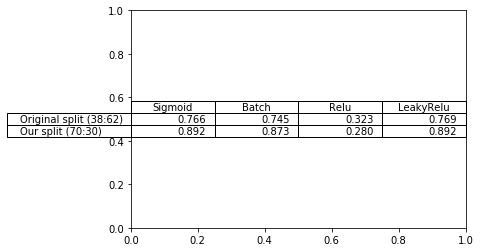

In [27]:
# TEST Accuracy plot
data = [[ sigmoid1[1], batch1[1],  relu1[1], leaky1[1]],
        [sigmoid2[1], batch2[1], relu2[1], leaky2[1]]]

columns = ('Sigmoid', 'Batch', 'Relu', 'LeakyRelu')
rows = ('Original split (38:62)', 'Our split (70:30)')
y_offset = np.zeros(len(columns))
index = np.arange(len(columns)) + 0.3
n_rows = len(rows)
cell_text = []
for row in range(n_rows):
    y_offset = data[row]
    cell_text.append(['%0.3f' % (x) for x in y_offset])

# Add a table
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      colLabels=columns,
                      loc='center')

In [28]:
df2 = pd.DataFrame(np.array([['Original split(38:62)',sigmoid1[1], batch1[1],  relu1[1], leaky1[1]], ['Our split(70:30)',sigmoid2[1], batch2[1], relu2[1], leaky2[1]]]), columns=['Split','Sigmoid', 'Batch', 'Relu','LeakyRelu'])
df2

Split             Sigmoid               Batch  \
0  Original split(38:62)   0.766153846337245  0.7446153847987835   
1       Our split(70:30)  0.8917197501583464  0.8726114657274477   

                 Relu           LeakyRelu  
0  0.3230769231227728  0.7692307694141681  
1   0.280254776215857  0.8917197501583464

In [29]:
# TRAINING ACCURACY
df3 = pd.DataFrame(np.array([['Original split(38:62)',sigmoid1_train[1], batch1_train[1],  relu1_train[1], leaky1_train[1]], ['Our split(70:30)',sigmoid2_train[1], batch2_train[1], relu2_train[1], leaky2_train[1]]]), columns=['Split','Sigmoid', 'Batch', 'Relu','LeakyRelu'])
df3

Split             Sigmoid               Batch  \
0  Original split(38:62)  0.9595959595959596                 1.0   
1       Our split(70:30)  0.8961748624108529  0.9262295081967213   

                 Relu           LeakyRelu  
0  0.2727272730283063  0.9696969696969697  
1  0.3142076505175054  0.9180327868852459